## Exploration vs. Exploitation

In reinforcement learning, the trade-off between exploration and exploitation is a core dilemma.

### 1. Exploitation
* **Concept**: Based on current experience, selecting the action with the highest estimated value that appears to be the best.
* **Objective**: To maximize current short-term rewards.
* **Disadvantage**: Because early estimates are often inaccurate, pure exploitation ($\epsilon = 0$) can easily cause the algorithm to lock onto a "suboptimal action" that coincidentally yielded a high reward early on, thereby missing the true "optimal action".

### 2. Exploration
* **Concept**: Forgoing the currently best-looking option to try random actions that haven't been pulled much yet.
* **Objective**: To gather more information and refine estimates, with the long-term goal of finding the truly high-reward actions.
* **Disadvantage**: During the exploration step, you are likely to receive very low rewards, sacrificing short-term gains. Over-exploration (e.g., $\epsilon = 0.1$) means that even when you are confident about the best action, you still waste 10% of your chances choosing blindly, preventing the total reward from reaching its peak.

### 3. The Trade-off ($\epsilon$-greedy Strategy)
The ideal strategy is to find a balance between the two. In our experiments, $\epsilon = 0.01$ performs the best. It spends 99% of the time greedily maximizing rewards and only 1% of the time mitigating unknown risks. It not only ensures that the algorithm eventually finds the true optimal solution but also minimizes the cost of trial and error.

--- 
**Code Demonstration Supplement:**
The following code simulates a 10-Armed Bandit environment and compares the average reward curves of three strategies: pure exploitation ($\epsilon=0$), over-exploration ($\epsilon=0.1$), and the optimal trade-off ($\epsilon=0.01$).

Running experiment for epsilon = 0.0...
Running experiment for epsilon = 0.01...
Running experiment for epsilon = 0.1...


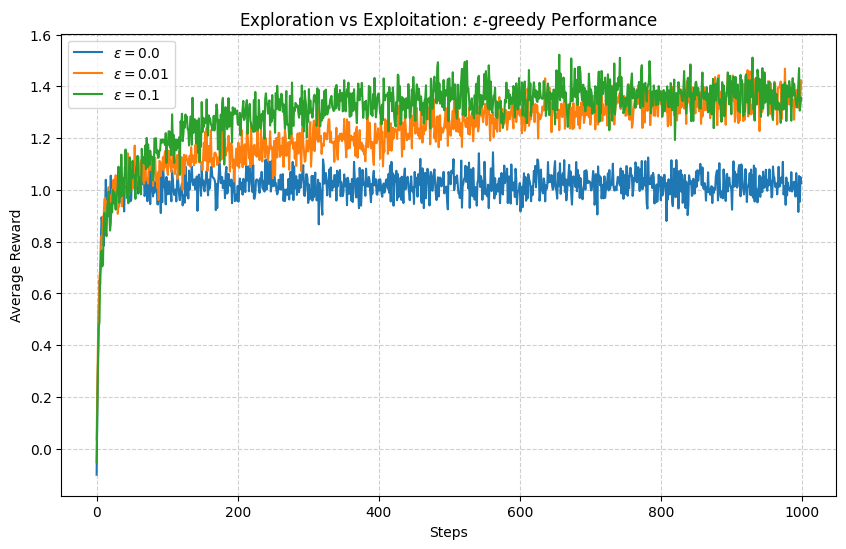

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the Multi-Armed Bandit Environment
class Bandit:
    def __init__(self, k=10):
        self.k = k
        # Randomly initialize the true reward means (q_true) for the k arms
        self.q_true = np.random.randn(k)
        self.best_action = np.argmax(self.q_true)

    def step(self, action):
        # Return a normally distributed reward: mean is the arm's true mean, variance is 1
        return np.random.randn() + self.q_true[action]

# 2. Define the epsilon-greedy experiment function
def run_bandit_experiment(epsilon, steps=1000, runs=500):
    rewards = np.zeros(steps)
    
    for run in range(runs):
        bandit = Bandit()
        q_estimates = np.zeros(bandit.k)   # Initialize value estimates to 0
        action_counts = np.zeros(bandit.k) # Initialize action counts to 0
        
        for step in range(steps):
            # Exploration vs. Exploitation trade-off
            if np.random.rand() < epsilon:
                action = np.random.choice(bandit.k) # Exploration: choose randomly
            else:
                action = np.argmax(q_estimates)     # Exploitation: choose greedily
            
            reward = bandit.step(action)
            
            # Update the record and estimate for the chosen action
            action_counts[action] += 1
            q_estimates[action] += (1.0 / action_counts[action]) * (reward - q_estimates[action])
            
            rewards[step] += reward
                
    return rewards / runs # Return the average rewards across all runs

# 3. Run the experiment and plot the results
epsilons = [0.0, 0.01, 0.1]
results = {}

for eps in epsilons:
    print(f"Running experiment for epsilon = {eps}...")
    results[eps] = run_bandit_experiment(eps)

plt.figure(figsize=(10, 6))
for eps in epsilons:
    plt.plot(results[eps], label=f'$\epsilon={eps}$')
    
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Exploration vs Exploitation: $\epsilon$-greedy Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()